In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
from PIL import Image
import random
import h5py
import torch
import torch.nn as nn
import torchvision
import io
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

# Explanatory Data Analysis

In [2]:
DATA_PATH = Path(r"C:\Users\tomti\Desktop\Data Science stuffs\Project Skin cancer")

In [3]:
train_metadata_df = pd.read_csv(DATA_PATH / "train-metadata.csv")
train_metadata_df

C:\Users\tomti\AppData\Local\Temp\ipykernel_39932\2361813609.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_metadata_df = pd.read_csv(DATA_PATH / "train-metadata.csv")


,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401054,ISIC_9999937,0,IP_1140263,70.0,male,anterior torso,6.80,TBP tile: close-up,3D: XP,22.574335,...,IL_9520694,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999988
401055,ISIC_9999951,0,IP_5678181,60.0,male,posterior torso,3.11,TBP tile: close-up,3D: white,19.977640,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999820
401056,ISIC_9999960,0,IP_0076153,65.0,female,anterior torso,2.05,TBP tile: close-up,3D: XP,17.332567,...,IL_9852274,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.999416
401057,ISIC_9999964,0,IP_5231513,30.0,female,anterior torso,2.80,TBP tile: close-up,3D: XP,22.288570,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,100.000000


In [4]:
list(train_metadata_df.columns)

['isic_id',
 'target',
 'patient_id',
 'age_approx',
 'sex',
 'anatom_site_general',
 'clin_size_long_diam_mm',
 'image_type',
 'tbp_tile_type',
 'tbp_lv_A',
 'tbp_lv_Aext',
 'tbp_lv_B',
 'tbp_lv_Bext',
 'tbp_lv_C',
 'tbp_lv_Cext',
 'tbp_lv_H',
 'tbp_lv_Hext',
 'tbp_lv_L',
 'tbp_lv_Lext',
 'tbp_lv_areaMM2',
 'tbp_lv_area_perim_ratio',
 'tbp_lv_color_std_mean',
 'tbp_lv_deltaA',
 'tbp_lv_deltaB',
 'tbp_lv_deltaL',
 'tbp_lv_deltaLB',
 'tbp_lv_deltaLBnorm',
 'tbp_lv_eccentricity',
 'tbp_lv_location',
 'tbp_lv_location_simple',
 'tbp_lv_minorAxisMM',
 'tbp_lv_nevi_confidence',
 'tbp_lv_norm_border',
 'tbp_lv_norm_color',
 'tbp_lv_perimeterMM',
 'tbp_lv_radial_color_std_max',
 'tbp_lv_stdL',
 'tbp_lv_stdLExt',
 'tbp_lv_symm_2axis',
 'tbp_lv_symm_2axis_angle',
 'tbp_lv_x',
 'tbp_lv_y',
 'tbp_lv_z',
 'attribution',
 'copyright_license',
 'lesion_id',
 'iddx_full',
 'iddx_1',
 'iddx_2',
 'iddx_3',
 'iddx_4',
 'iddx_5',
 'mel_mitotic_index',
 'mel_thick_mm',
 'tbp_lv_dnn_lesion_confidence']

In [5]:
train_metadata_df["patient_id"].value_counts()

patient_id
IP_1117889    9184
IP_5714646    6267
IP_3921915    5568
IP_7797815    4454
IP_9577633    3583
              ... 
IP_5792391       1
IP_1216329       1
IP_4004571       1
IP_1487179       1
IP_7696347       1
Name: count, Length: 1042, dtype: int64

In [6]:
train_metadata_df["target"].value_counts()

target
0    400666
1       393
Name: count, dtype: int64

In [7]:
test_metadata_df = pd.read_csv(DATA_PATH / "test-metadata.csv")
test_metadata_df

,isic_id,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license
0,ISIC_0015657,IP_6074337,45.0,male,posterior torso,2.70,TBP tile: close-up,3D: XP,22.80433,20.007270,...,0.304827,1.281532,2.299935,0.479339,20,-155.06510,1511.222000,113.980100,Memorial Sloan Kettering Cancer Center,CC-BY
1,ISIC_0015729,IP_1664139,35.0,female,lower extremity,2.52,TBP tile: close-up,3D: XP,16.64867,9.657964,...,0.000000,1.271940,2.011223,0.426230,25,-112.36924,629.535889,-15.019287,"Frazer Institute, The University of Queensland...",CC-BY
2,ISIC_0015740,IP_7142616,65.0,male,posterior torso,3.16,TBP tile: close-up,3D: XP,24.25384,19.937380,...,0.230742,1.080308,2.705857,0.366071,110,-84.29282,1303.978000,-28.576050,FNQH Cairns,CC-BY


In [8]:
[col for col in train_metadata_df.columns if col not in test_metadata_df.columns]

['target',
 'lesion_id',
 'iddx_full',
 'iddx_1',
 'iddx_2',
 'iddx_3',
 'iddx_4',
 'iddx_5',
 'mel_mitotic_index',
 'mel_thick_mm',
 'tbp_lv_dnn_lesion_confidence']

In [9]:
sample_submission_df = pd.read_csv(DATA_PATH / "sample_submission.csv")
sample_submission_df

,isic_id,target
0,ISIC_0015657,0.3
1,ISIC_0015729,0.3
2,ISIC_0015740,0.3


In [10]:
train_imgs_filenames = os.listdir(DATA_PATH / "train-image/image")
print(train_imgs_filenames[:5])
print("len imgs: ", len(train_imgs_filenames))

['ISIC_0015670.jpg', 'ISIC_0015845.jpg', 'ISIC_0015864.jpg', 'ISIC_0015902.jpg', 'ISIC_0024200.jpg']
len imgs:  401059


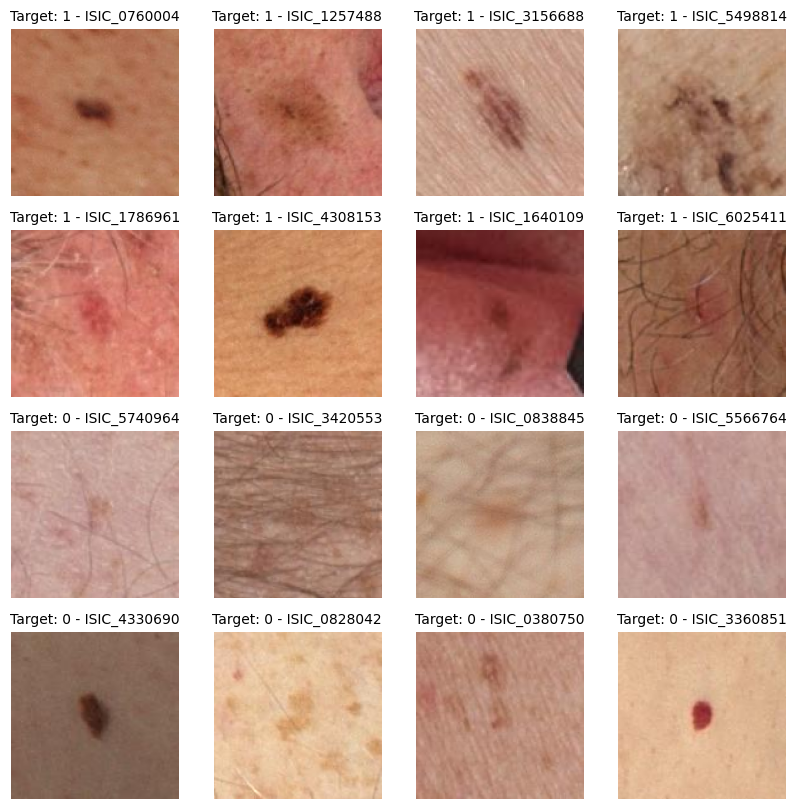

In [14]:
pos_img_files = random.sample(list(train_metadata_df.loc[train_metadata_df["target"]==1]["isic_id"]),8)
neg_img_files = random.sample(list(train_metadata_df.loc[train_metadata_df["target"]==0]["isic_id"]), 8)
pos_img_files
fig, axs = plt.subplots(4, 4, figsize=(10, 10))

for ax, image_file, target in zip(axs.flatten(), pos_img_files+neg_img_files, [1]*8+[0]*8):
    img = Image.open(DATA_PATH / "train-image/image" / f"{image_file}.jpg")
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"Target: {target} - {image_file}", fontsize =10)

plt.show()

In [15]:
# %%time
# def read_images_from_hdf5(file_path):
#     with h5py.File(file_path, 'r') as file:
#         ids_list = list(file.keys())        
#         ids_images = {}
#         for img_id in tqdm(ids_list):
#             image_data = file[img_id][()]
#             image = Image.open(io.BytesIO(image_data))
#             ids_images[img_id] = np.array(image)
            
#     return ids_images

# train_imgs = read_images_from_hdf5(DATA_PATH / "train-image.hdf5")
# train_imgs[list(train_imgs.keys())[0]], train_imgs[list(train_imgs.keys())[0]].shape

In [16]:
# Check if that images are squared and plot sizes distribution

# sizes = []
# for k in train_imgs:
#     if train_imgs[k].shape[0] != train_imgs[k].shape[1]:
#         print(k, train_imgs[k].shape[0], train_imgs[k].shape[1])
#     sizes.append(train_imgs[k].shape[0])
    
# plt.hist(sizes, bins=50)
# plt.show()

## Dataset and DataLoader

In [17]:
import torch
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

In [21]:
class SkinCancerDataset(Dataset):
    def __init__(
        self,
        metadata_df,
        root_dir=DATA_PATH/"train-image/image/",
        transform = None,
        train = True,
    ):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.metadata = metadata_df
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.metadata)
    def __getitem__(self, idx):
        img_name = self.root_dir / f"{self.metadata.iloc[idx]['isic_id']}.jpg"
        image = Image.open(img_name).convert("RGB")
        label = int(self.metadata.iloc[idx]["target"])

        if self.transform:
            image = self.transform(image)

        return image, label
    
    

In [22]:
transform = transforms.Compose(
    [
        transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

# batch_size = 4

In [23]:
# Split the dataset into training set and testing set
train_metadata, val_metadata = train_test_split(train_metadata_df, test_size=0.1, stratify=train_metadata_df["target"])

# Create datasets
train_dataset = SkinCancerDataset(metadata_df=train_metadata, transform=transform)
val_dataset = SkinCancerDataset(metadata_df=val_metadata, transform=transform)


In [24]:
train_dataset

In [33]:
# Calculate class weights to balance them
class_counts = train_metadata['target'].value_counts().to_dict()
print(class_counts)
class_weights = {cls: 1 / counts for cls, counts in class_counts.items()}
print(class_weights)
sample_weights = [class_weights[target] for target in train_metadata['target']]

{0: 360599, 1: 354}
{0: 2.773163541773549e-06, 1: 0.002824858757062147}


In [34]:
# The sampler will balance the positive and negative classes in the loader
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)
# Create Dataloader
train_loader = DataLoader(train_dataset, batch_size=2048, sampler=sampler)
test_loader = DataLoader(val_dataset, batch_size=2048, shuffle=False)

torch.Size([2048, 3, 128, 128])


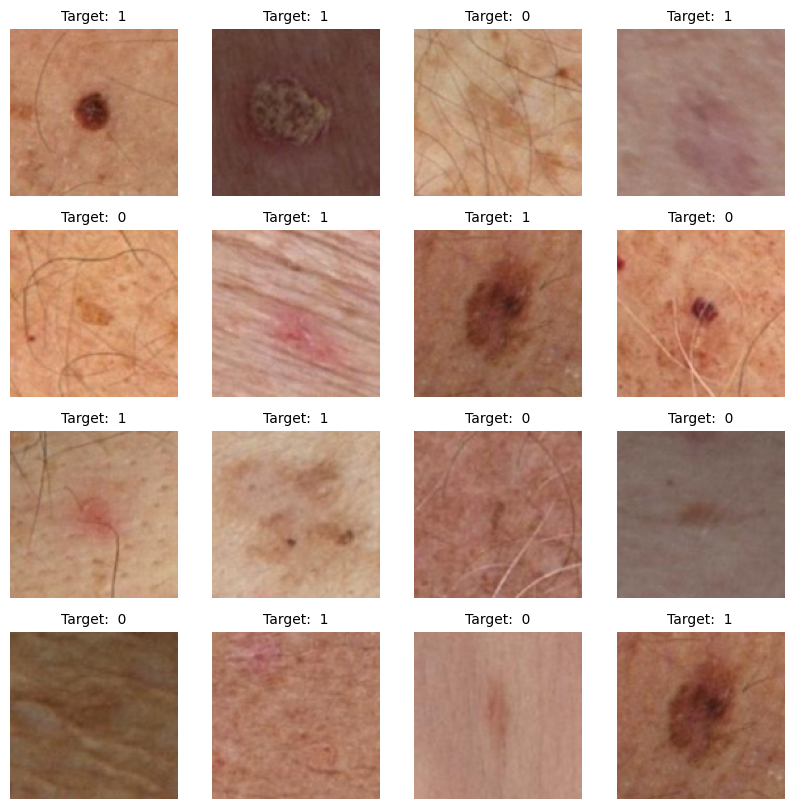

In [40]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
dataiter = iter(train_loader)
images, labels = next(dataiter)
print(images.shape)
for ax, img, label in zip(axs.flatten(), images, labels):
    img = img.permute(1, 2, 0).numpy() / 2 + 0.5
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"Target:  {label}", fontsize = 10)

# plt.tight_layout()
plt.show()

In [41]:
from sklearn.metrics import auc, roc_curve

def score(solution: np.array, submission: np.array, min_tpr: float=0.80) -> float:
    # rescale the target. set 0s to 1s and 1s to 0s (since sklearn only has max_fpr)
    v_gt =abs(solution-1)
    # flip the submissions to their compliments
    v_pred = -1 * submission
    max_fpr = abs(1-min_tpr)

    # Using sklearn.metric function: roc_curve and auc

    fpr, tpr, _ = roc_curve(v_gt, v_pred, sample_weight=None)
    if max_fpr is None or max_fpr ==1:
        return auc(fpr, tpr)
    if max_fpr <= 0 or max_fpr > 1:
        raise ValueError("Expected min_tpr in range [0, 1), got: %r" % min_tpr)
    
    # Add a single point at max_fpr by linear interpolation
    stop = np.searchsorted(fpr, max_fpr, "right")
    x_interp = [fpr[stop-1], fpr[stop]]
    y_interp = [tpr[stop-1], tpr[stop]]
    tpr = np.append(tpr[:stop], np.interp(max_fpr, x_interp, y_interp))
    fpr = np.append(fpr[:stop], max_fpr)
    partial_auc = auc(fpr, tpr)

    return partial_auc


## CNN Pytorch model definition

In [ ]:
# Define a CNN model

class SkinCancerNet(nn.Module):
    def __init__ (self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(2,2)

        self.conv2 = nn.Conv2d(16, 32, 5)
        self.bn2 = nn.BatchNorm2d(32)
        
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.bn3 = nn.BatchNorm2d(64)

        self.conv4 = nn.Conv2d(64, 128, 3)
        self.bn4 = nn.BatchNorm2d(128)

        # Calculate the size of the feature map after the conv and pool layers
        # Input size: 128x128
        # After conv1: (128 - 5 + 1) = 124 -> 124x124
        # After pool1: 124 / 2 = 62 -> 62x62
        # After conv2: (62 - 5 + 1) = 58 -> 58x58
        # After pool2: 58 / 2 = 29 -> 29x29
        # After conv3: (29 - 3 + 1) = 27 -> 27x27
        # After pool3: 27 / 2 = 13.5 -> 13x13 (rounding down)
        # After conv4: (13 - 3 + 1) = 11 -> 11x11
        # After pool4: 11 / 2 = 5.5 -> 5x5 (rounding down)

        